In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from yellowbrick.model_selection import FeatureImportances
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.metrics import r2_score


In [29]:
df = pd.read_csv('data.csv')

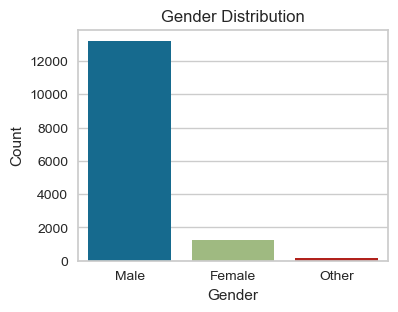

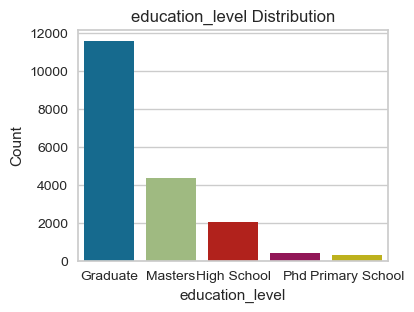

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制一个性别分布的柱状图。
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(4, 3))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

# 绘制一个教育水平分布的柱状图。
education_level_counts = df['education_level'].value_counts()
plt.figure(figsize=(4, 3))
sns.barplot(x=education_level_counts.index, y=education_level_counts.values)
plt.xlabel('education_level')
plt.ylabel('Count')
plt.title('education_level Distribution')
plt.show()

以下是对每个特征进行编码的部分：

- 'gender'特征：将缺失值填充为0，然后使用字典映射将'Male'、'Female'和'Other'分别替换为1、2和3。
- 'relevent_experience'特征：使用字典映射将'Has relevent experience'和'No relevent experience'分别替换为1和2。
- 'enrolled_university'特征：将缺失值填充为0，然后使用字典映射将'no_enrollment'、'Full time course'和'Part time course'分别替换为1、2和3。
- 'education_level'特征：将缺失值填充为0，然后使用字典映射将'Graduate'、'Masters'、'High School'、'Phd'和'Primary School'分别替换为1、2、3、4和5。
- 'major_discipline'特征：将缺失值填充为0，然后使用字典映射将'STEM'、'Business Degree'、'Arts'、'Humanities'、'No Major'和'Other'分别替换为 1、2、3、4、5和6。
- 'experience'特征：将缺失值填充为0，然后使用字典映射将'>20'替换为25，'<1'替换为0.5，并将数据类型转换为浮点型。
- 'company_size'特征：使用字典映射将'<10'、'10/49'、'50-99'、'100-500'、'500-999'、'1000-4999'、'5000-9999'和'10000+'分别替换为5、30、75、- 300、750、3000、7500和15000，并将缺失值填充为0。
- 'company_type'特征：使用字典映射将'Pvt Ltd'、'Funded Startup'、'Public Sector'、'Early Stage Startup'、'NGO'和'Other'分别替换为1、2、3、4、5和6，并将缺失值填充为0。
- 'last_new_job'特征：使用字典映射将'>4'替换为5，'never'替换为0，并将缺失值填充为0，并将数据类型转换为浮点型。

In [31]:
# 处理'gender'特征
df['gender'].fillna(0, inplace=True) # 将缺失值填充为0
df['gender'].replace({'Male': 1, 'Female': 2, 'Other': 3}, inplace=True) # 将'Male'替换为1，'Female'替换为2，'Other'替换为3

# 处理'relevent_experience'特征
df['relevent_experience'].replace({'Has relevent experience': 1, 'No relevent experience': 2}, inplace=True) # 将'Has relevent experience'替换为1，'No relevent experience'替换为2

# 处理'enrolled_university'特征
df['enrolled_university'].fillna(0, inplace=True) # 将缺失值填充为0
df['enrolled_university'].replace({'no_enrollment': 1, 'Full time course': 2, 'Part time course': 3}, inplace=True) # 将'no_enrollment'替换为1，'Full time course'替换为2，'Part time course'替换为3

# 处理'education_level'特征
df['education_level'].fillna(0, inplace=True) # 将缺失值填充为0
df['education_level'].replace({'Graduate': 1, 'Masters': 2, 'High School': 3, 'Phd': 4, 'Primary School': 5}, inplace=True) # 将'Graduate'替换为1，'Masters'替换为2，'High School'替换为3，'Phd'替换为4，'Primary School'替换为5

# 处理'major_discipline'特征
df['major_discipline'].fillna(0, inplace=True) # 将缺失值填充为0
df['major_discipline'].replace({'STEM': 1, 'Business Degree': 2, 'Arts': 3, 'Humanities': 4, 'No Major': 5, 'Other': 6}, inplace=True) # 将'STEM'替换为1，'Business Degree'替换为2，'Arts'替换为3，'Humanities'替换为4，'No Major'替换为5，'Other'替换为6

# 处理'experience'特征
df['experience'].fillna(0, inplace=True) # 将缺失值填充为0
df['experience'].replace({'>20': 25, '<1': 0.5}, inplace=True) # 将'>20'替换为25，'<1'替换为0.5
df['experience'] = df['experience'].astype(float) # 将数据类型转换为float

# 处理'company_size'特征
df['company_size'].replace({'<10': 5, '10/49': 30, '50-99': 75, '100-500': 300, '500-999': 750, '1000-4999': 3000, '5000-9999': 7500, '10000+': 15000}, inplace=True) # 根据公司规模的大小进行映射
df['company_size'].fillna(0, inplace=True) # 将缺失值填充为0

# 处理'company_type'特征
df['company_type'].replace({'Pvt Ltd': 1, 'Funded Startup': 2, 'Public Sector': 3, 'Early Stage Startup': 4, 'NGO': 5, 'Other': 6}, inplace=True) # 根据公司类型进行映射
df['company_type'].fillna(0, inplace=True) # 将缺失值填充为0

# 处理'last_new_job'特征
df['last_new_job'].replace({'>4': 5, 'never': 0}, inplace=True) # 将'>4'替换为5，'never'替换为0
df['last_new_job'].fillna(0, inplace=True) # 将缺失值填充为0
df['last_new_job'] = df['last_new_job'].astype(float) # 将数据类型转换为float

X = df.drop(['enrollee_id', 'city', 'target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


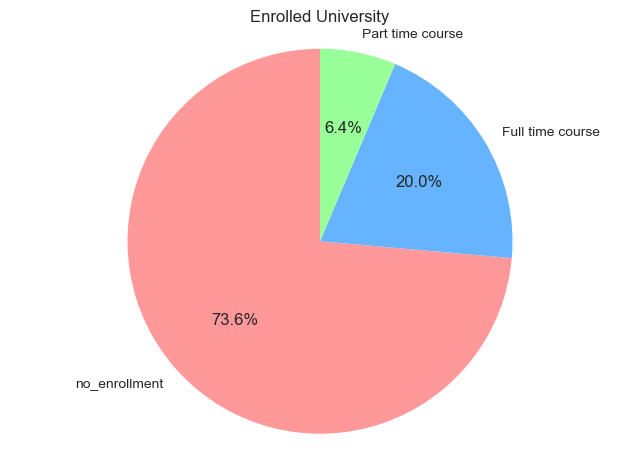

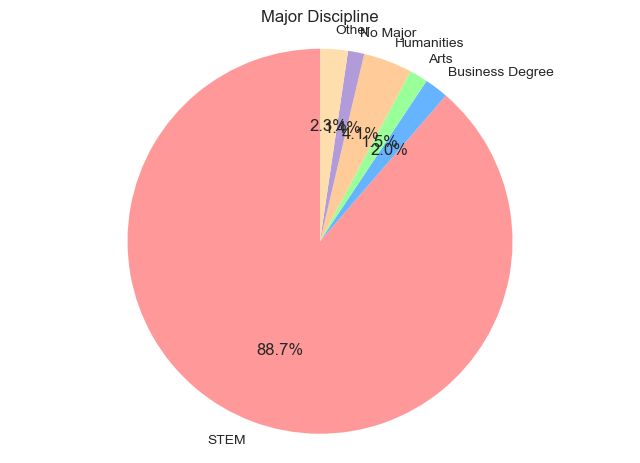

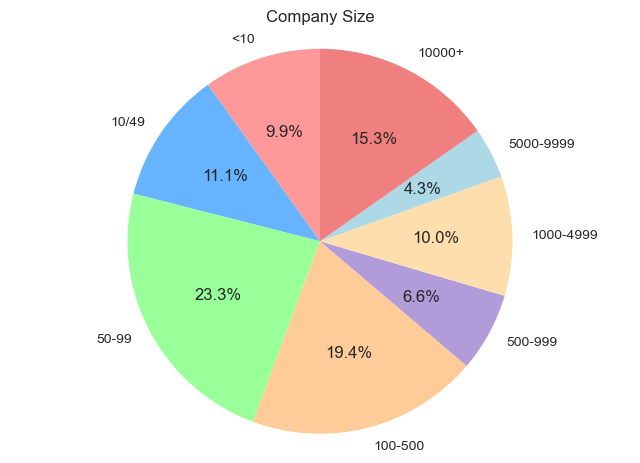

In [32]:
# 处理 'enrolled_university' 特征
enrolled_university_count = df['enrolled_university'].value_counts()
labels = ['no_enrollment', 'Full time course', 'Part time course']
sizes = [enrolled_university_count[1], enrolled_university_count[2], enrolled_university_count[3]]
colors = ['#ff9999','#66b3ff','#99ff99']

# 生成饼图
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Enrolled University')
plt.show()

# 处理 'major_discipline' 特征
major_discipline_count = df['major_discipline'].value_counts()
labels = ['STEM', 'Business Degree', 'Arts', 'Humanities', 'No Major', 'Other']
sizes = [major_discipline_count[1], major_discipline_count[2], major_discipline_count[3], major_discipline_count[4], major_discipline_count[5], major_discipline_count[6]]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#B19CD9', '#FFDEAD']

# 生成饼图
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Major Discipline')
plt.show()

# 处理 'company_size' 特征
company_size_count = df['company_size'].value_counts()
labels = ['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
sizes = [company_size_count[5], company_size_count[30], company_size_count[75], company_size_count[300], company_size_count[750], company_size_count[3000], company_size_count[7500], company_size_count[15000]]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#B19CD9', '#FFDEAD', '#ADD8E6', '#F08080']

# 生成饼图
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Company Size')
plt.show()

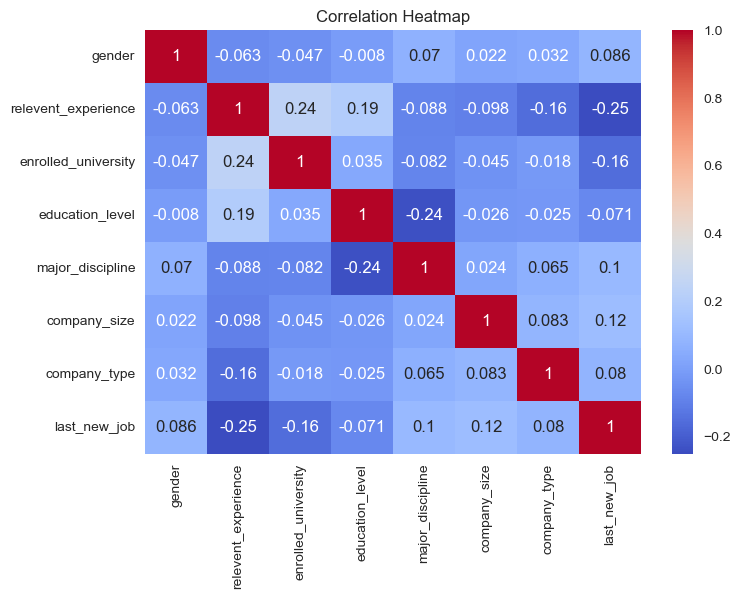

In [33]:
features = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type', 'last_new_job']

corr = df[features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


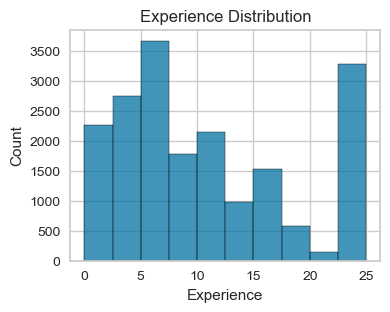

In [34]:
# 绘制经验水平直方图
plt.figure(figsize=(4, 3))
sns.histplot(df['experience'], bins=10)
plt.xlabel('Experience')
plt.ylabel('Count')
plt.title('Experience Distribution')
plt.show()

#### Random Forest

均方误差（Mean Squared Error）: 0.16
R平方值（R-Squared）: 0.16


d:\DSW\Conda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


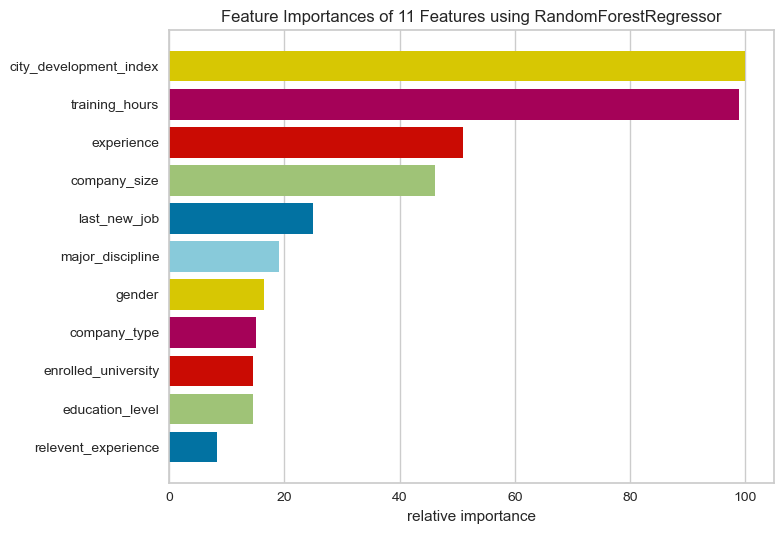

<Axes: title={'center': 'Feature Importances of 11 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [35]:
# 初始化随机森林回归模型
rf_model = RandomForestRegressor()

# 训练模型
rf_model.fit(X_train, y_train)

# 预测
y_pred = rf_model.predict(X_test)

# 使用均方误差评估模型
mse = mean_squared_error(y_test, y_pred)
print("均方误差（Mean Squared Error）: {:.2f}".format(mse))

# 计算R平方值
r2 = r2_score(y_test, y_pred)
print("R平方值（R-Squared）: {:.2f}".format(r2))

# 使用yellowbrick可视化特征重要性
from yellowbrick.model_selection import FeatureImportances
visualizer = FeatureImportances(rf_model)
visualizer.fit(X, y)
visualizer.show()


#### Decision Tree

均方误差（Mean Squared Error）: 0.29
R平方值（R-Squared）: -0.53


d:\DSW\Conda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


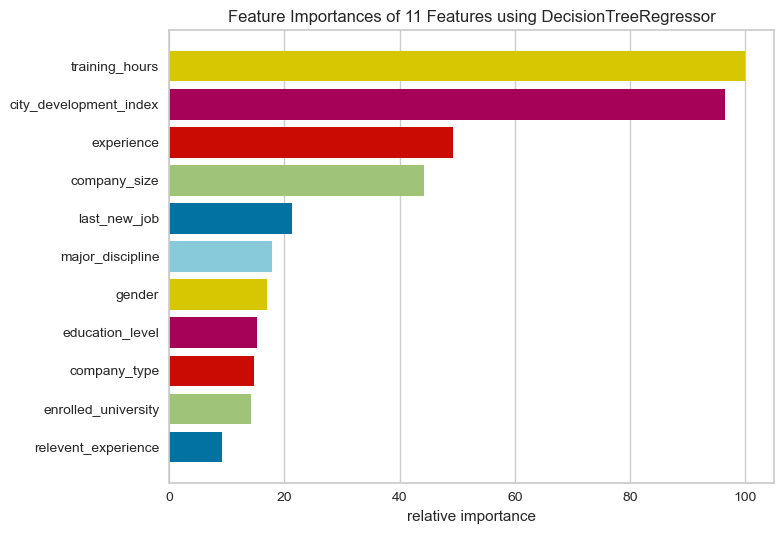

<Axes: title={'center': 'Feature Importances of 11 Features using DecisionTreeRegressor'}, xlabel='relative importance'>

In [36]:
# 初始化决策树回归模型
tree_model = DecisionTreeRegressor()

# 训练模型
tree_model.fit(X_train, y_train)

# 预测
y_pred = tree_model.predict(X_test)

# 使用均方误差评估模型
mse = mean_squared_error(y_test, y_pred)
print("均方误差（Mean Squared Error）: {:.2f}".format(mse))

# 计算R平方值
r2 = r2_score(y_test, y_pred)
print("R平方值（R-Squared）: {:.2f}".format(r2))

# 使用yellowbrick可视化特征重要性
visualizer = FeatureImportances(tree_model)
visualizer.fit(X, y)
visualizer.show()


#### KNN

In [37]:
# 初始化KNN回归模型
knn_model = KNeighborsRegressor()

# 训练模型
knn_model.fit(X_train, y_train)

# 预测
y_pred = knn_model.predict(X_test)

# 使用均方误差评估模型
mse = mean_squared_error(y_test, y_pred)
print("均方误差（Mean Squared Error）: {:.2f}".format(mse))

# 计算R平方值
r2 = r2_score(y_test, y_pred)
print("R平方值（R-Squared）: {:.2f}".format(r2))


均方误差（Mean Squared Error）: 0.20
R平方值（R-Squared）: -0.05


d:\DSW\Conda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\DSW\Conda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\DSW\Conda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\DSW\Conda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\DSW\Conda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\DSW\Conda\lib\site-packages\IPython\core\pylabt

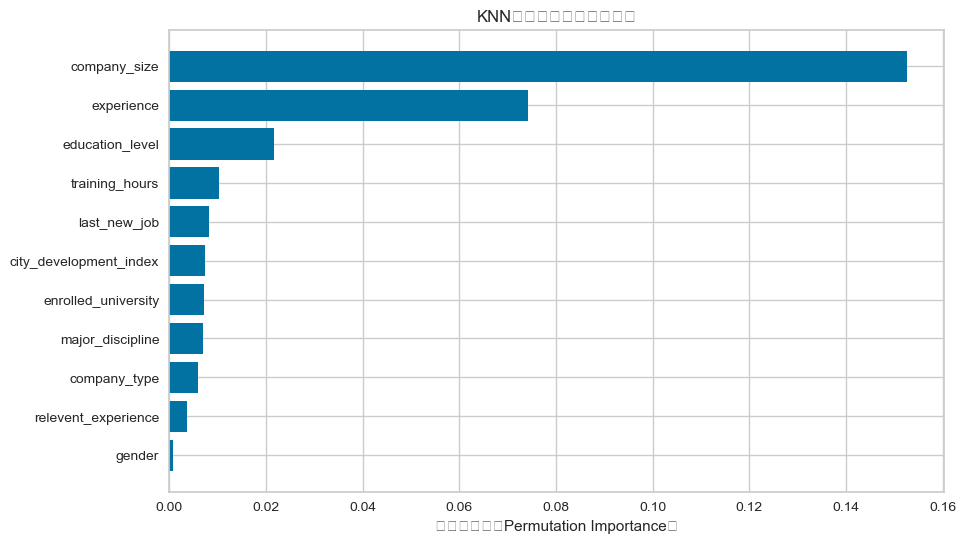

In [38]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# 获取特征名称
feature_names = X_test.columns

# 提取平均重要性
result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean

# 对特征和重要性进行排序
indices = importances.argsort()
feature_names_sorted = [feature_names[i] for i in indices]
importances_sorted = importances[indices]

# 绘制水平条形图
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances_sorted)), importances_sorted, align='center')
plt.yticks(range(len(importances_sorted)), feature_names_sorted)
plt.xlabel('排列重要性（Permutation Importance）')
plt.title('KNN模型特征的排列重要性')
plt.show()


#### Best Model Train

In [39]:
# 导入必要的库
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 将数据分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化并使用最佳超参数训练模型
best_model = RandomForestRegressor(n_estimators=100, max_depth=5) 
best_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = best_model.predict(X_test)

# 使用适当的指标（例如均方误差）评估模型
mse = mean_squared_error(y_test, y_pred)
print("均方误差（Mean Squared Error）: {:.2f}".format(mse))

# 计算R平方值
r2 = r2_score(y_test, y_pred)
print("R平方值（R-Squared）: {:.2f}".format(r2))

# 获取在测试集上的最终得分
final_score = best_model.score(X_test, y_test)
print("最终得分（Final Score）: {:.2f}".format(final_score))


均方误差（Mean Squared Error）: 0.14
R平方值（R-Squared）: 0.24
最终得分（Final Score）: 0.24
